In [3]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

import time

from IPython import display

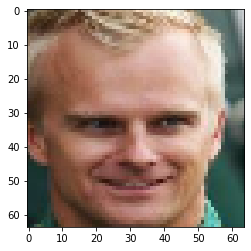

In [22]:
def load_image(img_path):
    img = tf.io.read_file(img_path) 
    img = tf.image.decode_jpeg(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    # img = tf.image.resize(img, [64, 64])
    # img = tf.image.resize_with_crop_or_pad(img, 128, 128)
    img = tf.image.central_crop(img, 0.7)
    img = tf.image.resize(img, [64, 64])
    # img = img * 2 - 1
    return img

raw = load_image('D:/Data/Face/celeba/Male/positive/000013.jpg')


# croped = tf.image.resize_with_crop_or_pad(raw, 40, 40)
# print(croped)

plt.imshow(raw)
plt.show()

In [ ]:
tf.keras.backend.clear_session() 

def make_generator_model():
    model = tf.keras.Sequential()

    model.add(tf.keras.Input(shape=(100, )))

    model.add(layers.Dense(8 * 8 * 256, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5),
                               strides=(1, 1),
                               padding='same',
                               use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 8, 8, 128)

    model.add(layers.Conv2DTranspose(64, (5, 5),
                               strides=(2, 2),
                               padding='same',
                               use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 16, 16, 64)

    model.add(layers.Conv2DTranspose(32, (5, 5),
                               strides=(2, 2),
                               padding='same',
                               use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 32, 32, 32)

    model.add(layers.Conv2DTranspose(3, (5, 5),
                               strides=(2, 2),
                               padding='same',
                               use_bias=False,
                               activation='tanh'))
    assert model.output_shape == (None, 64, 64, 3)


    return model


def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(64, 64, 3)))

    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model


In [ ]:
noise = tf.random.normal([1, 100])
generator = make_generator_model()
predict = generator(noise, training=False)
predict = (predict + 1) / 2
print(predict[0])
plt.imshow(predict[0])
plt.show()

In [ ]:
plt.imshow((predict[0] + 1) / 2)
plt.show()